#Data Science Academy
#Fundamentos de Linguagem Python Para Análise de Dados e Data Science
#Introdução a Deep Learning com TensorFlow
Problema de Negócio:

Construir um modelo de Inteligência Artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem.

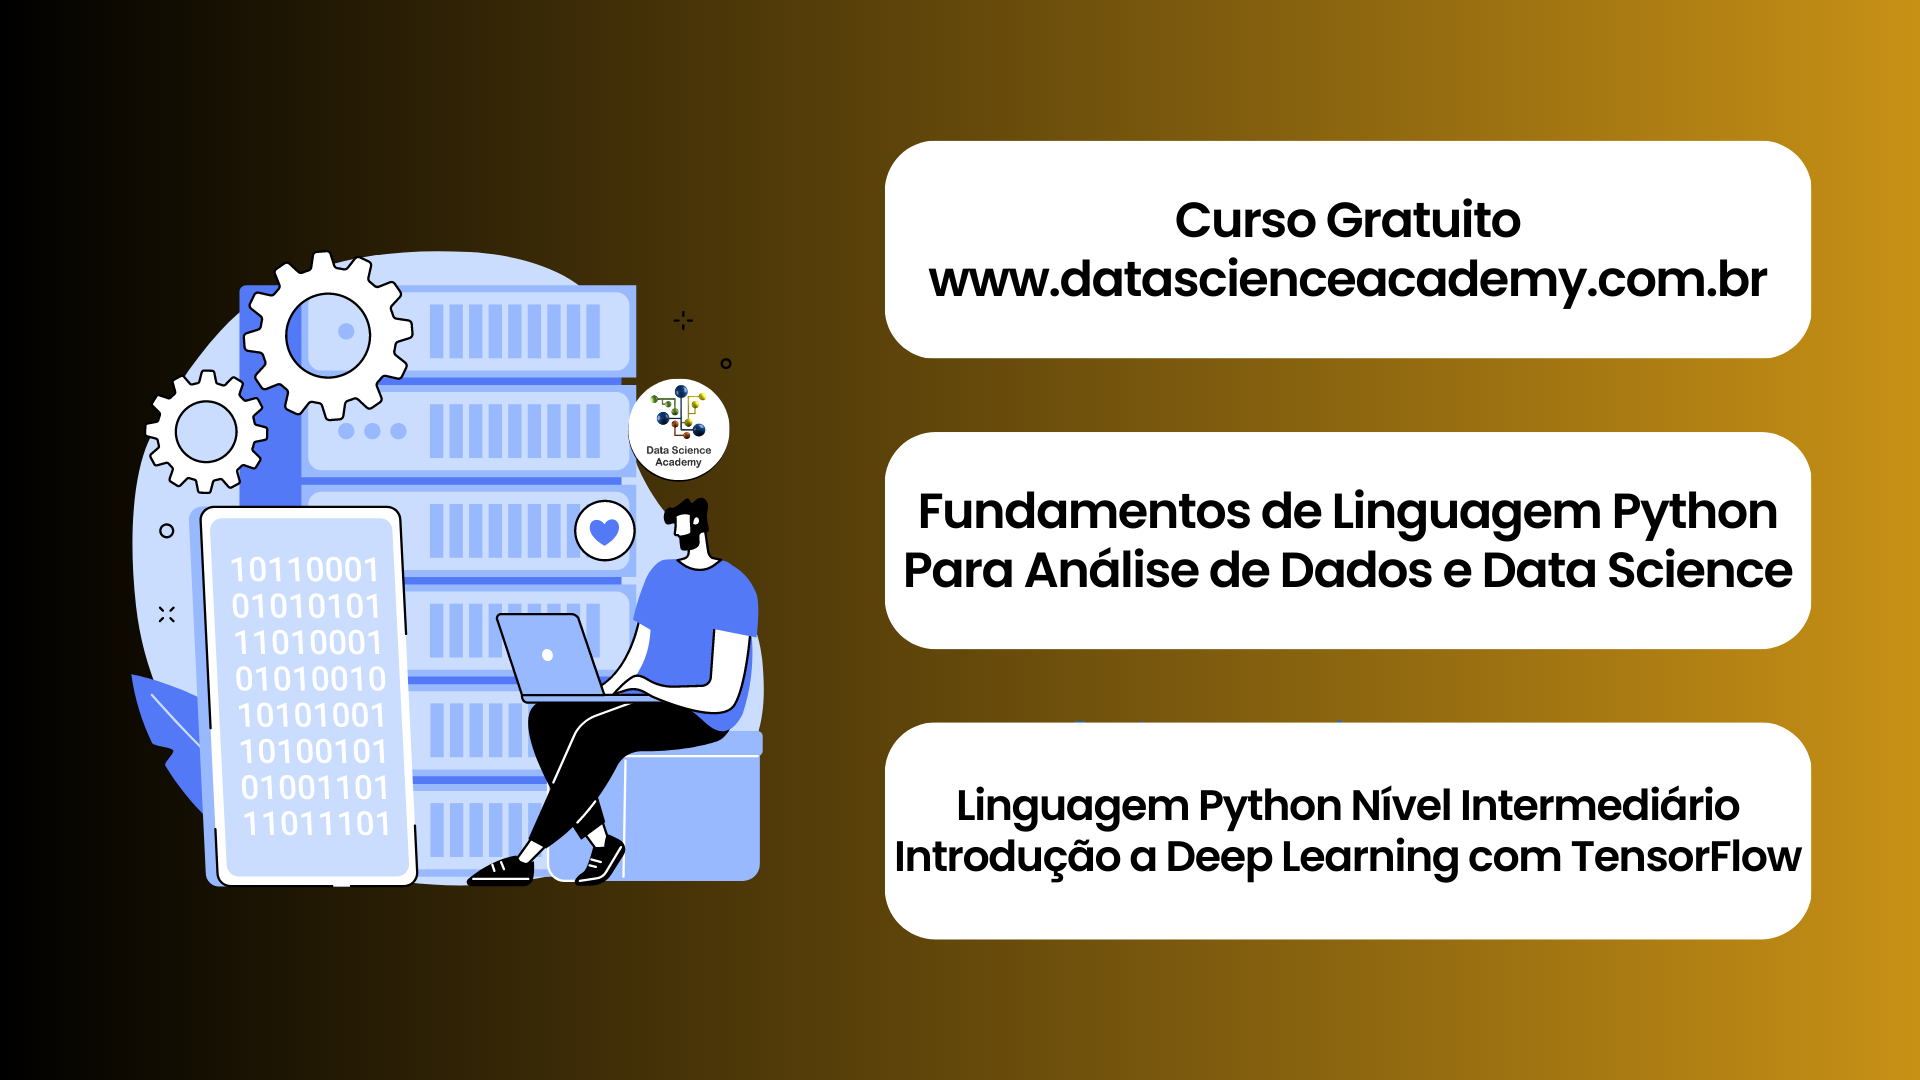

https://www.tensorflow.org/

ATENÇÃO: O TensorFlow pode apresentar problemas em algumas versões de sistema operacional. Verifique a documentação oficial no link acima.

In [ ]:
# Instala o TF
!pip install -q tensorflow==2.12

In [ ]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [ ]:
# Imports
# A partir da versão 2.x do tensorflow esse é o caminho oficial para o keras
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##Carregando os dados

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste)=datasets.cifar10.load_data()

In [ ]:
# Classe das imagens
nomes_classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

##Pré-Processamento e Visualização das Imagens

In [ ]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino=imagens_treino/255.0
imagens_teste=imagens_teste/255.0

In [ ]:
# Função para exibir as imagens
def visualiza_imagens(images,labels):
  plt.figure(figsize=(12,6))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(nomes_classes[labels[i][0]])
  plt.show()

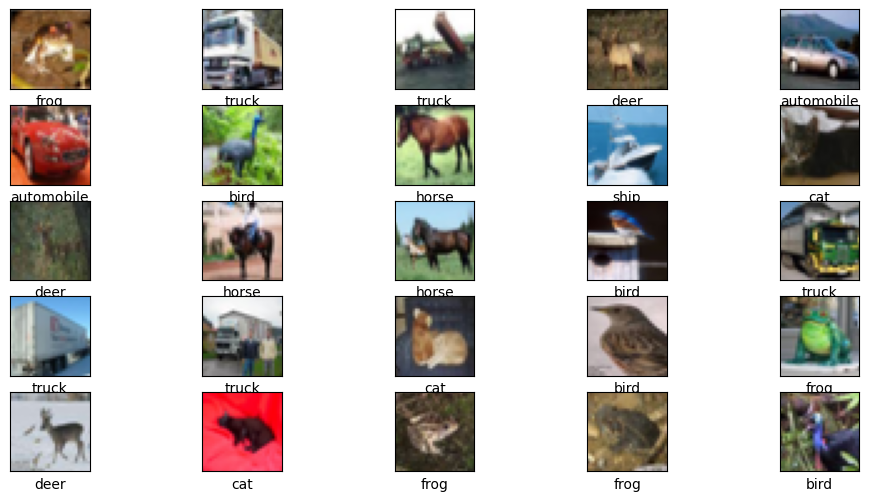

In [ ]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

## Construção do modelo

Construção de modelos é estudada nas Formações: Formação Cientista de Dados e Formação Engenheiro de IA.

www.deeplearningbook.com.br

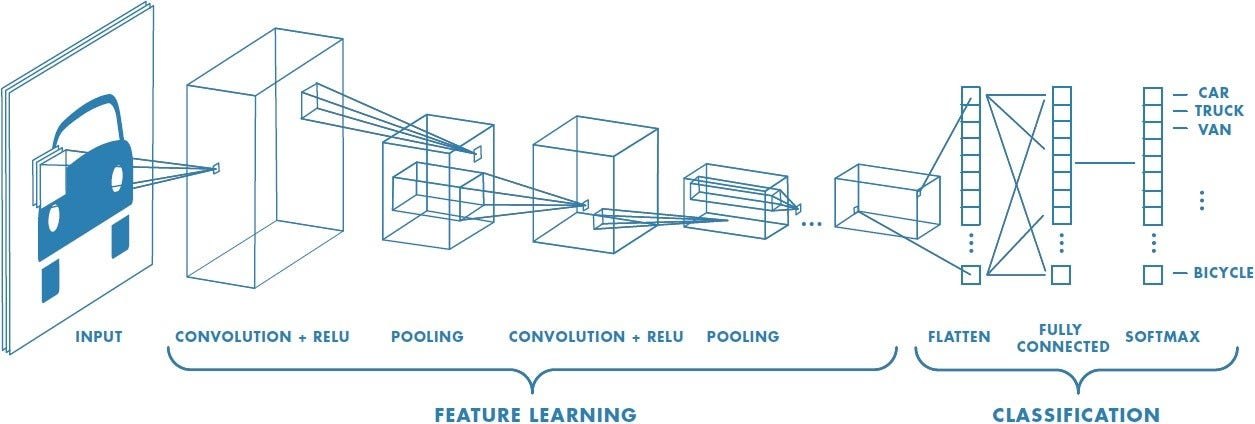

In [ ]:
# Modelo

# Cria o objeto de sequência de camadas
modelo_dsa=models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
modelo_dsa.add(layers.MaxPooling2D((2,2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64,(3,3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D((2,2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64,(3,3), activation='relu'))
modelo_dsa.add(layers.MaxPooling2D((2,2)))

# Feature Learning

In [ ]:
# Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten()) # Flatten
modelo_dsa.add(layers.Dense(64,activation='relu')) # Fully Connected
modelo_dsa.add(layers.Dense(10,activation='softmax')) # Softmax

# Classification

In [ ]:
# Sumário do modelo
modelo_dsa.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [ ]:
# Compilação do modelo
modelo_dsa.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
history=modelo_dsa.fit(imagens_treino,labels_treino,epochs=10,validation_data=(imagens_teste,labels_teste))

Epoch 1/10
1563/1563 [==============================] - 94s 59ms/step - loss: 1.6069 - accuracy: 0.4109 - val_loss: 1.3359 - val_accuracy: 0.5146
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2474 - accuracy: 0.5563 - val_loss: 1.1956 - val_accuracy: 0.5794
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.1020 - accuracy: 0.6122 - val_loss: 1.1054 - val_accuracy: 0.6142
Epoch 4/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.0124 - accuracy: 0.6451 - val_loss: 0.9916 - val_accuracy: 0.6527
Epoch 5/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.9364 - accuracy: 0.6721 - val_loss: 0.9972 - val_accuracy: 0.6504
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8832 - accuracy: 0.6912 - val_loss: 0.9322 - val_accuracy: 0.6704
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8322 - accuracy: 0.7102 - val_loss: 0.9213 

## Avaliação do Modelo

In [ ]:
# Avalia o modelo
erro_teste, acc_teste=modelo_dsa.evaluate(imagens_teste, labels_teste, verbose=2)

313/313 - 3s - loss: 0.9766 - accuracy: 0.6749 - 3s/epoch - 11ms/step


In [ ]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.6748999953269958


## Deploy do Modelo
Deploy do modelo é estudado especialmente na Formação Engenheiro de Machine Learning.

In [ ]:
# Carrega uma nova imagem
nova_imagem=Image.open('nova_imagem.jpg')

In [ ]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [ ]:
# Obtém a largura e altura da imagem
largura=nova_imagem.width
altura=nova_imagem.height

In [ ]:
print('A largura da imagem é:', largura)
print('A altura da imagem é:', altura)

A largura da imagem é: 1919
A altura da imagem é: 1199


In [ ]:
# Redimensiona para 32x32 pixels
nova_imagem= nova_imagem.resize((32,32))

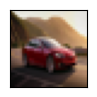

In [ ]:
# Exibir a imagem
plt.figure(figsize=(1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Converte a imagem para um array numpy e normaliza
nova_imagem_array=np.array(nova_imagem)/255.0

In [ ]:
# Expande a dimensão do array para que ele tenha o formato (1,32,32,3)
nova_imagem_array=np.expand_dims(nova_imagem_array,axis=0)

In [ ]:
# Previsões
previsoes=modelo_dsa.predict(nova_imagem_array)

1/1 [==============================] - 0s 191ms/step


In [ ]:
print(previsoes)

[[3.2100240e-06 9.9428928e-01 1.8338082e-07 4.0081716e-07 2.3051383e-08
  1.2364154e-07 2.1280775e-06 1.7083121e-08 2.5007716e-05 5.6795110e-03]]


In [ ]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista=np.argmax(previsoes)
nome_classe_prevista=nomes_classes[classe_prevista]

In [ ]:
print('A nova classe foi classificada como:', nome_classe_prevista)

A nova classe foi classificada como: automobile


##Fim